In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# bayes thm

$P(A|B) = \frac{P(B | A) * P(A)}{P(B)}$

ex. 

machine 1 production: 30 wrenches/hr
machine 2 production: 20 wrenches/hr

out of all parts 1% are defective

machine 1 we see 50% out of all are defective 
machine 2 we see 50% out of all are defective

what is the prob that machine 2 makes a defective part? 

$P(m1) = 30/50 = .6$ - uneeded

$P(m2) = 20/50 = .4$

$P(defect) = .01$

$P(m1 | defect) = .5$ - uneeded

$P(m2 | defect) = .5$


$P(defect | m2) = ?$

$P(defect | m2) = \frac{P(m2 | defect) * P(defect)}{P(m2)}$


$P(defect | m2) = \frac{.5 * .01}{.4} = .0125$


# naive bayes intuition

bayes thm: $P(A|B) = \frac{P(B | A) * P(A)}{P(B)}$

ex.

salary and age as features -> predicting whether or not someone walks to work

- step 1: $P(walks|X) = \frac{P(X | walks) * P(walks)}{P(X)}$

- prior prob = P(A) or P(walks)

- marginal likelihood (posterior) = P(B) or P(X)

- likelihood = P(B | A) or P(X | walks)

- posterior prob = P(A | B) or P(walks | x)


step 2: $P(drives|X) = \frac{P(X | drives) * P(drives)}{P(X)}$

- prior prob = P(A) or P(drives)

- marginal likelihood (posterior) = P(B) or P(X)

- likelihood = P(B | A) or P(X | drives)

- posterior prob = P(A | B) or P(drives | x)


step 3: compare: P(walks | X) vs. P(drives | X)

**marginal likelihood is calculated according to radius around new data point - within this radius the number of similiar observations are recorded**
- $P(X) = \frac{similiar\ observations}{total\ observations}$


**likelihood is calculated according to a radius around data point again - but only takes the number of observations which align to category in the second param**
- $\frac{number\ of\ categories\ in\ radius}{total\ of\ category}$
- - $P(X | walks) = \frac{similiar\ observations\ in\ category}{total\ observations\ in\ category}$


## why is it called naive
- **independence assumption**
- do not need to calculate P(X) because it is the same in both calculations if you are using them in comparison!
    - but if you are looking for raw probs, you need to use it
    - may need it for comparing to other models

## what happens with more than 2 classes
- just need to take maximum

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
X = df.iloc[:, [2,3]].values
y = df.iloc[:, 4].values

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


input classifier below

In [14]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [15]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [16]:
cm

array([[65,  3],
       [ 7, 25]])

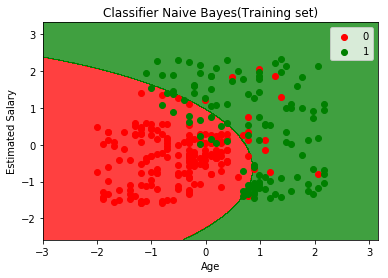

In [17]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier Naive Bayes(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

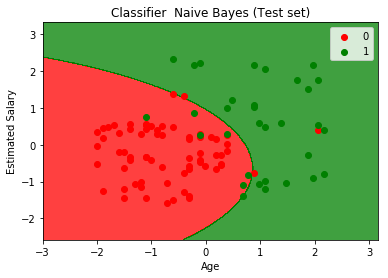

In [18]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier  Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()